# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +29.41689944669                   -1.39    5.13s
  2   +20.77648142910        0.94       -0.80   10.4ms
  3   +15.32033395991        0.74       -0.29   10.3ms
  4   +11.62120280865        0.57       -0.34   10.2ms
  5   +11.28679852525       -0.48       -0.59   8.30ms
  6   +10.37013004948       -0.04       -0.71   8.26ms
  7   +9.283381427998        0.04       -0.75   8.24ms
  8   +8.677609773743       -0.22       -0.80   8.24ms
  9   +8.460704920097       -0.66       -0.87   8.31ms
 10   +8.288134043181       -0.76       -0.97   8.28ms
 11   +8.076780015482       -0.67       -0.98   8.45ms
 12   +7.947545705832       -0.89       -0.98   62.3ms
 13   +7.917022432055       -1.52       -1.11   6.66ms
 14   +7.893207382660       -1.62       -1.20   6.41ms
 15   +7.864462973783       -1.54       -1.24   6.37ms
 16   +7.833032420069       -1.50       -1.27   6.28ms
 17   +7.82

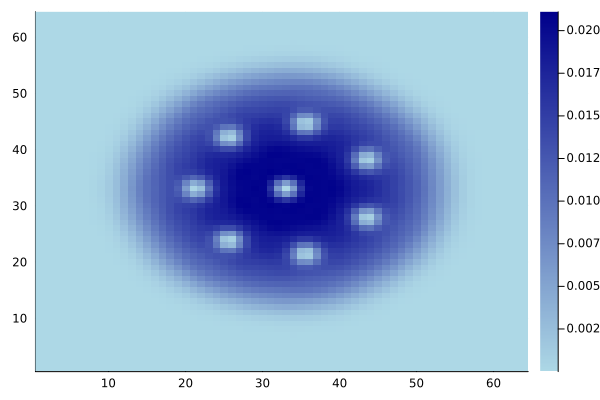

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)